# Aula - Otimização de Hiperparâmetros

Hoje, vamos discutir como selecionar os melhores hiperparâmetros para um dado problema.

1. Introdução à otimização de hiperparâmetros.
2. Usando Grid Search
3. Usando Random Search

# 1. Introdução à otimização de hiperparâmetros

Juntando o que foi visto no curso de estatística e o que foi visto até agora no curso de aprendizado de máquina, já aprendemos alguns modelos.

<font size=4> <b> Classificação </b> </font>
- Regressão Logística
- Árvore de decisão (CART)
- KNN


<font size=4> <b> Regressão </b> </font>
- Regressão Linear 
- Árvore de decisão (CART)
- KNN


Os de regressão logística e regressão linear não têm muitas escolhas prévias que se precisa fazer. No máximo determinar a melhor regularização.

Já o KNN  e as árvores de decisão têm configurações intrínsecas que afetam completamente o resultado, como o número de vizinhos ("K") e a profundidade da árvore, respectivamente. Essas configurações a gente chama de __hiperparâmetros__, e eles controlam o aprendizado.

Queremos então descobrir quais hiperparâmetros vão me ajudar a gerar o melhor modelo possível para o meu problema. Para um ou até dois parâmetros esse processo pode ser feito facilmente "na mão". Porém, à medida que a quantidade de hiperparâmetros aumenta, a quantidade de testes que temos que fazer aumentará __exponencialmente__ e será bem útil fazer uso de algumas técnicas conhecidas.

## 1.1 Diferença entre hiperparâmetro e parâmetro

As nomenclaturas podem parecer um pouco confusas e parecidas a primeira vista, mas as diferenças são perceptíveis ao enxergar com mais atenção. 

O __parâmetro de um modelo é algo que será ajustado no processo de treinamento dele e depende dos dados__. Os parâmetros são parte do modelo e são aprendidos através dos dados. Geralmente os parâmetros são estimados utilizando-se algum algoritimo de otimização.

Já um __hiperparâmetro é uma configuração externa que controla o processo de treinamento__. Os hiperparâmetros não são estimados diretamente pelos dados, como os parâmetros. Geralmente fazemos um tuning para estimá-los.

| Parâmetro | Hiperparâmetro |
|-----------|----------------|
| Configurações internas do modelo | São explicitamente especificadas para controlar o treinamento |
| Essenciais para realizar as predições | São essenciais para otimizar o modelo | 
| Especificadas ou estimadas DURANTE o treinamento | Definidas ANTES do treinamento |
| São internas ao modelo | São externas ao modelo |
| São aprendidas e setadas pelo modelo | Setadas manualmente via tuning |
| Estimados por algoritimos de otimização como Gradiente Descendente | Estimados via tuning dos hiperparâmetros |
| Decidem a performance em dados desconhecidos | Decidem a qualidade do modelo |
| Exemplos: coeficientes da equação em uma Regressão Linear ou Logística, as regras criadas pela Árvore de Decisão, o centróide do cluster | Profundidade da árvore, o K do KNN |


## 1.2. Como otimizar hiperparâmetros?

A forma mais direta de pensar em como fazer essa otimização é assumir que cada escolha de hiperparâmetros é um modelo diferente. Assim, vamos treinar o modelo com cada escolha em um conjunto de treino, e comparar todos com uma estratégia de avaliação de modelos (usando um conjunto de validação ou uma validação cruzada).

Isso é o mesmo que fizemos até agora para avaliação de modelos.

A única diferença é que, como dito antes, a quantidade de escolhas cresce exponencialmente com a quantidade de hiperparâmetros. Se tivermos 2 hiperparâmetros, cada um com 4 valores, teríamos $4^2 = 16 $ escolhas possíveis. Se tivermos 4 hiperparâmetros, teríamos $ 4^4 = 256 $ escolhas possíveis.

Isso nos motiva a criar estratégias quanto a como avaliar todas essas escolhas. Existem 2 estratégias básicas que usamos:
- Grid Search
- Random Search

Vamos exemplificar cada uma dessas estratégias usando um modelo de árvore de decisão.

Vamos começar sem usar nenhuma estratégia, e ver qual seria o nosso baseline.

In [14]:
# Importando as bibliotecas para matemática e visualização
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
with open('../data/winequality.names', 'r') as fp:
    print(fp.read())

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [16]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier

In [17]:
# Pegando os dados
wine = pd.read_csv('../data/wine_quality_white.csv', sep=';')

In [18]:
# Separa em treino e teste
X = wine.drop(columns=['quality'])
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)


In [19]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3690,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5
3463,6.2,0.30,0.31,1.6,0.035,40.0,106.0,0.98914,3.26,0.39,12.9
683,6.4,0.27,0.32,4.5,0.240,61.0,174.0,0.99480,3.12,0.48,9.4
3698,6.3,0.22,0.34,1.2,0.036,32.0,96.0,0.98961,3.06,0.74,11.6
3253,5.3,0.30,0.16,4.2,0.029,37.0,100.0,0.99050,3.30,0.36,11.8


In [20]:
y_train.value_counts()

6    1758
5    1166
7     704
8     140
4     130
3      16
9       4
Name: quality, dtype: int64

Vamos converter nosso problema de multi-classes em um binário

In [23]:
from sklearn.preprocessing import Binarizer

bin = Binarizer(threshold=5)
y_train = bin.fit_transform(y_train.values.reshape(-1, 1))
y_train

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [24]:
y_test = bin.transform(y_test.values.reshape(-1, 1))

In [25]:
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [26]:
# Converte y_train para dataframe
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [28]:
# Verifica classes desbalanceadas
y_train.value_counts(normalize=True)

1    0.665135
0    0.334865
dtype: float64

In [33]:
# Instancia o DT
model_sem_otim = DecisionTreeClassifier(max_depth=6, , random_state=42)


# Faz a validação cruzada
results_no_optim = cross_validate(model_sem_otim, X_train, y_train, scoring='accuracy', return_train_score=True, 
    cv=5)

In [34]:
results_no_optim

{'fit_time': array([0.00585127, 0.00776362, 0.00619817, 0.00640631, 0.00767612]),
 'score_time': array([0.00187302, 0.00254869, 0.0013814 , 0.00271392, 0.00216794]),
 'test_score': array([0.7130102 , 0.71428571, 0.7244898 , 0.74457216, 0.73435504]),
 'train_score': array([0.74984046, 0.73292916, 0.74728781, 0.73269537, 0.73971292])}

In [35]:
print(f" Acurácia treino: {100*results_no_optim['train_score'].mean():0.1f}")

acc_sem_otimizacao = results_no_optim['test_score'].mean()
print(f" Acurácia na validação: {100*acc_sem_otimizacao:0.1f}")

 Acurácia treino: 74.0
 Acurácia na validação: 72.6


In [36]:
# Faz o fit nos dados de treino
model_sem_otim.fit(X_train, y_train)

# Faz a predição no teste
y_pred = model_sem_otim.predict(X_test)

print(f" Acurácia teste: {100*accuracy_score(y_test, y_pred):0.1f}")

 Acurácia teste: 73.7


In [37]:
model_sem_otim.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

# 2. Grid Search

É o nosso método extensivo e de força bruta. Escolhemos os valores que queremos testar para nossos hiperparâmetros e testamos todas as escolhas possíveis. Essa estratégia vai ser __MUITO__ custosa computacionalmente e tende a demorar bastante.

<center><img src="https://www.researchgate.net/profile/Karl-Ezra-Pilario/publication/341691661/figure/fig2/AS:896464364507139@1590745168758/Comparison-between-a-grid-search-and-b-random-search-for-hyper-parameter-tuning-The.png" style="height: 350px"/></center>


O `scikit-learn` tem um função que pode nos ajudar nesse processo. Está dentro da parte de `model_selection` e se chama [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), que utiliza o método de validação cruzada.

Atenção com a escolha da métrica:

<img src="images/model_evaluation.png">

[link](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [38]:
# Instancia novamente O DT
model_grid = DecisionTreeClassifier(max_depth=2, random_state=42)

In [39]:
print("Hiperparâmetros do DecisionTreeClassifier:")
model_grid.get_params()

Hiperparâmetros do DecisionTreeClassifier:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Vamos criar um grid de parâmetros a serem testados:

In [40]:
X_train.shape

(3918, 11)

In [44]:
2**10

1024

In [53]:
# Critério do split
criterions = ['gini', 'entropy']

# Profundidades máximas que iremos testar
max_depth = list(np.arange(2, 12))
max_depth.append(None)

# Número de pontos mínimos necessário para permitir um split no nó
min_samples_split = np.arange(4, 11)

# Número de pontos mínimos que podem existir em cada folha (nó final)
min_samples_leaf = np.arange(2, 8)

# Criamos o grid de escolhas
params_grid = {'criterion': ['gini', 'entropy'],
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

params_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, None],
 'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7])}

Total de modelos a serem comparados:

In [51]:
len(criterions)*len(max_depth)*len(min_samples_split)*len(min_samples_leaf)

924

In [52]:
# Importa a classe GridSearchCV do sklearn.model_selection
from sklearn.model_selection import GridSearchCV

In [54]:
# Construindo o objeto "otimizador via grid search com validação cruzada" verbose=2
grid_search = GridSearchCV(model_grid, scoring='accuracy', verbose=2, return_train_score=True,
                    param_grid = params_grid, cv = 3)

In [55]:
%%time
# Faz o fit do grid search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 924 candidates, totalling 2772 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, None],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
print(grid_search.cv_results_)

In [ ]:
# Converte cv_results_ em pandas dataframe
df = pd.DataFrame(grid_search.cv_results_)
df.head(20)

In [59]:
# Retorna os melhores parâmetros e o melhor score
grid_search.best_score_

0.7651863195507912

In [60]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [62]:
# Obtém o best_score do treino
acc_grid_search_train = df.sort_values("rank_test_score")['mean_train_score'].iloc[0]
print(f" Acurácia treino: {100*acc_grid_search_train:0.5f}")

 Acurácia treino: 87.82542


In [63]:
# Obtém o best_score da validação
acc_grid_search = grid_search.best_score_

print(f" Acurácia validação: {100*acc_grid_search:0.5f}")

 Acurácia validação: 76.51863


In [64]:
# Retorna o best_estimator_
# Store the best model in a variable to reference later

best_model = grid_search.best_estimator_

No final da validação cruzada o grid search, por default, re-treina o modelo utilizando os melhores parâmetros encontrados no dataset inteiro. E retorna para a gente um método `predict` com esse modelo.

For multiple metric evaluation, this needs to be a str denoting the scorer that would be used to find the best parameters for refitting the estimator at the end.

In [66]:
# Faz o predict no conjunto de teste
y_pred_grid = best_model.predict(X_test)

print(f" Acurácia teste: {100*accuracy_score(y_test, y_pred_grid):0.1f}")

 Acurácia teste: 76.2


In [70]:
from sklearn.metrics import classification_report

print(
    classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.65      0.62      0.64       328
           1       0.81      0.83      0.82       652

    accuracy                           0.76       980
   macro avg       0.73      0.73      0.73       980
weighted avg       0.76      0.76      0.76       980



In [71]:
y_train.value_counts()

1    2606
0    1312
dtype: int64

In [72]:
model_grid.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

_________________
__________________
____________________

In [74]:
params_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, None],
 'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7])}

In [73]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

precision = TP/(TP+FP) <br>
recall = TP/(TP+FN)

In [83]:
df.sort_values("rank_test_score", ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
799,0.013292,0.001425,0.001157,0.000064,entropy,10,2,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.751914,0.767228,0.776417,0.765186,0.010107,1,0.862940,0.898928,0.872894,0.878254,0.015173
800,0.013252,0.000172,0.001155,0.000089,entropy,10,2,6,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.747320,0.762634,0.777182,0.762379,0.012193,2,0.862557,0.898162,0.868300,0.876340,0.015608
798,0.011713,0.000828,0.001306,0.000160,entropy,10,2,4,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.744257,0.767994,0.773354,0.761868,0.012644,3,0.864472,0.899694,0.874809,0.879658,0.014783
805,0.012299,0.001192,0.001158,0.000185,entropy,10,3,4,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.745789,0.766462,0.770291,0.760847,0.010762,4,0.859112,0.890123,0.870980,0.873405,0.012776
806,0.011676,0.000137,0.001122,0.000048,entropy,10,3,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.745789,0.766462,0.770291,0.760847,0.010762,4,0.859112,0.890123,0.870980,0.873405,0.012776


<AxesSubplot:xlabel='mean_test_score', ylabel='mean_train_score'>

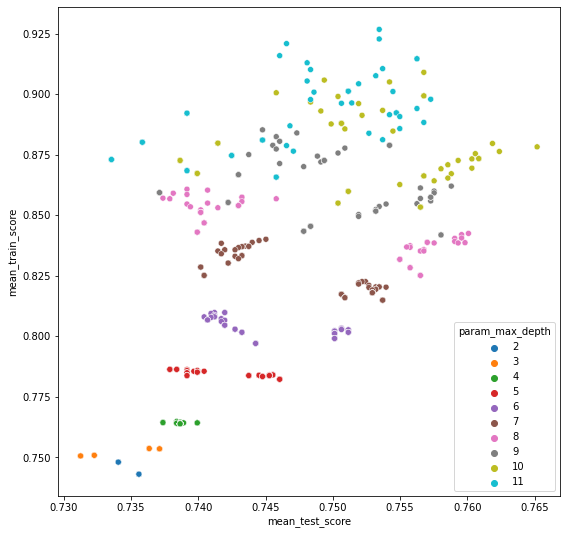

In [86]:
# line = np.arange(0.73, 0.96, 0.05)
# sns.lineplot(x=line, y=line, color='red')
plt.figure(figsize=(9, 9))
sns.scatterplot(data=df, x='mean_test_score', y='mean_train_score', hue='param_max_depth')

# 3. Random Search

### [Random Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)

É parecido com o grid search, pois vamos montar um grupo de escolhas possíveis. Porém, ao invés de compararmos todas as escolhas, nós pegamos uma __amostra aleatória__ (sem reposição) delas, e selecionamos o melhor caso dentro dessa amostra. 

<center><img src="https://www.researchgate.net/profile/Karl-Ezra-Pilario/publication/341691661/figure/fig2/AS:896464364507139@1590745168758/Comparison-between-a-grid-search-and-b-random-search-for-hyper-parameter-tuning-The.png" style="height: 350px"/></center>

In [87]:
# Instancia DT novamente
model_random = DecisionTreeClassifier(max_depth=2, random_state=42)

# Importa model_selection.RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [88]:
# O parâmetro n_iter vai controlar o tamanho da nossa amostra.
random_search = RandomizedSearchCV(model_random, scoring='accuracy', cv=3, return_train_score=True,
                                    n_iter=50, param_distributions=params_grid, verbose=2)

In [90]:
%%time
# Faz o fit do random_search
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, m

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, None],
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10])},
                   return_train_score=True, scoring='accuracy', verbose=2)

In [92]:
# Converte o cv_results_ em pandas dataframe
df = pd.DataFrame(random_search.cv_results_)

In [93]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.008209,0.000302,0.001396,0.000150,4,3,5,gini,"{'min_samples_split': 4, 'min_samples_leaf': 3...",0.741960,0.744257,0.731240,0.739153,0.005673,33,0.800536,0.782925,0.775268,0.786243,0.010579
1,0.015503,0.000672,0.001457,0.000088,4,3,None,entropy,"{'min_samples_split': 4, 'min_samples_leaf': 3...",0.709801,0.758806,0.769525,0.746044,0.025999,14,0.955590,0.953292,0.956355,0.955079,0.001301
2,0.006852,0.000211,0.001176,0.000075,5,5,4,entropy,"{'min_samples_split': 5, 'min_samples_leaf': 5...",0.735069,0.732772,0.744257,0.737366,0.004962,37,0.777948,0.757657,0.758040,0.764548,0.009476
3,0.010693,0.000668,0.001497,0.000039,4,5,7,entropy,"{'min_samples_split': 4, 'min_samples_leaf': 5...",0.758806,0.732006,0.761103,0.750638,0.013208,9,0.816233,0.822741,0.813170,0.817381,0.003991
4,0.010448,0.001052,0.001625,0.000309,4,4,7,gini,"{'min_samples_split': 4, 'min_samples_leaf': 4...",0.740429,0.739663,0.749617,0.743236,0.004523,19,0.835375,0.834992,0.829632,0.833333,0.002622


In [94]:
# Retorna melhores parâmetros
random_search.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 10,
 'criterion': 'entropy'}

In [95]:
random_search.best_score_

0.7608473711077081

In [97]:
best_model = random_search.best_estimator_

In [98]:
# Obtém o best_score do treino
acc_random_search_train = df.sort_values("rank_test_score")['mean_train_score'].iloc[0]
print(f" Acurácia treino: {100*acc_random_search_train:0.1f}")

# Obtém o best_score da validação
acc_random_search = random_search.best_score_
print(f" Acurácia validação: {100*acc_random_search:0.1f}")

# Faz o predict no X_test
y_pred_random = best_model.predict(X_test)

print(f" Acurácia teste: {100*accuracy_score(y_test, y_pred_random):0.1f}")

 Acurácia treino: 87.3
 Acurácia validação: 76.1
 Acurácia teste: 76.9


# Comparando resultados

In [99]:
print("Comparação das Acurácias: ")
print('Acurácia sem Otimização:         ', np.round(100*acc_sem_otimizacao, 2))
print('Acurácia com GridSearchCV:       ', np.round(100*acc_grid_search, 2))
print('Acurácia com RandomizedSearchCV: ', np.round(100*acc_random_search, 2))

Comparação das Acurácias: 
Acurácia sem Otimização:          72.61
Acurácia com GridSearchCV:        76.52
Acurácia com RandomizedSearchCV:  76.08


### Avaliando mais de uma métrica
Podemos passar mais de uma métrica para avaliação, mas a escolha de melhor modelo e parâmetros irá depender da métrica indicada no parâmetro `refit`

In [100]:
#Metrics for Evualation:
met_grid= ['accuracy', 'f1']

random_search_m = RandomizedSearchCV(estimator = model_random, 
                                   param_distributions = params_grid, 
                                   scoring=met_grid,
                                   refit='accuracy',
                                   n_iter=10, 
                                   cv=3, 
                                   verbose=2,
                                   return_train_score=True)

random_search_m.fit(X_train, y_train)
y_pred = random_search_m.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=9; total time=   0.0s
[CV] END criterion=gi

In [101]:
df = pd.DataFrame(random_search_m.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_accuracy,...,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,mean_train_f1,std_train_f1
0,0.009817,0.000533,0.001882,0.000078,6,6,7,entropy,"{'min_samples_split': 6, 'min_samples_leaf': 6...",0.757274,...,0.804961,0.831085,0.818197,0.010668,1,0.860098,0.869614,0.865574,0.865095,0.003900
1,0.011057,0.000390,0.002307,0.000211,7,5,None,gini,"{'min_samples_split': 7, 'min_samples_leaf': 5...",0.706738,...,0.812903,0.811092,0.801587,0.014741,10,0.925209,0.927283,0.925851,0.926114,0.000867
2,0.012225,0.000342,0.002159,0.000016,9,5,None,entropy,"{'min_samples_split': 9, 'min_samples_leaf': 5...",0.727412,...,0.809002,0.814019,0.806141,0.007865,7,0.934639,0.937087,0.937679,0.936468,0.001316
3,0.010644,0.001295,0.002075,0.000201,10,7,10,gini,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.727412,...,0.802120,0.815359,0.805676,0.006927,9,0.903466,0.898837,0.898774,0.900359,0.002197
4,0.003690,0.000160,0.001644,0.000106,5,6,2,entropy,"{'min_samples_split': 5, 'min_samples_leaf': 6...",0.735069,...,0.796767,0.814081,0.809324,0.008966,4,0.823184,0.808000,0.814329,0.815171,0.006227


_____________________________
_____________________________
_____________________________


## Exercícios
1. Faça a otimização de parâmetros para o Decision Tree e o KNN das aulas anteriores.

2. Utilize o exemplo abaixo para investigar o comportamento de alguns hiperparâmetros 

In [102]:
# list of integers 1 to 30
# integers we want to try
hiperparameter_range = range(1, 51)

# list of scores from k_range
train_scores = []
pred_scores = []

# 1. we will loop through reasonable values of hiperparameter
for k in hiperparameter_range:
    # 2. run KNeighborsClassifier with k neighbours
    model = DecisionTreeClassifier(max_depth=k)
    # 3. obtain cross_validate for KNeighborsClassifier with k neighbours
    scores = cross_validate(model, X_train, y_train, cv=3, scoring='accuracy')
    # 4. append mean of scores
    train_scores.append(scores['test_score'].mean())
    # 5. train model
    model.fit(X_train, y_train)
    # 6. predict on test
    y_pred = model.predict(X_test)
    # 7. append accuracy score for predictions
    pred_scores.append(accuracy_score(y_test, y_pred))


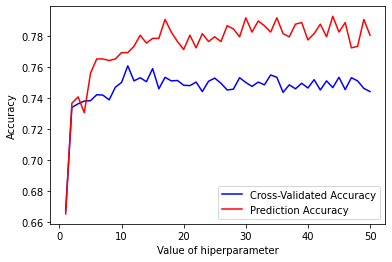

In [103]:
# plot the value of hiperparameter (x-axis) versus the accuracy (y-axis)
plt.plot(hiperparameter_range, train_scores, c='blue', label='Cross-Validated Accuracy')
plt.plot(hiperparameter_range, pred_scores, c='red', label='Prediction Accuracy')

plt.xlabel('Value of hiperparameter')
plt.ylabel('Accuracy')
plt.legend()



## Bibliografia e Aprofundamento
- [Bayesian x Random Search](https://miro.medium.com/max/1400/1*Xfnh-biDrMCECEO37qecKQ.png)
- [Outras otimizações: Evolutionary Search e Gradient Search](https://www.youtube.com/watch?v=TP9W7hmb0Bs)
- [XGBoost Hyperparameter Tuning - A Visual Guide](https://kevinvecmanis.io/machine%20learning/hyperparameter%20tuning/dataviz/python/2019/05/11/XGBoost-Tuning-Visual-Guide.html)
- [Como o tunning afeta o overfiting - bem legal!](https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Complexity_Learning_curves/Complexity_Learning_Analysis_Lending_Data.ipynb)
- [Plot de hiperparâmetros](https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/)